# Text Classification Using Naive Bayes - Theory & A Working Example
https://towardsdatascience.com/text-classification-using-naive-bayes-theory-a-working-example-2ef4b7eb7d5a

The dataset is divided into two parts, namely, feature matrix and the response/target vector.

+ The Feature matrix (X) contains all the vectors(rows) of the dataset in which each vector consists of the value of dependent features. The number of features is d i.e. X = (x1,x2,x2, xd).
+ The Response/target vector (y) contains the value of class/group variable for each row of feature matrix.

## Counting Example

First we will understand how we will count word frequencies in the corpus before starting the exercise.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


## Importing Libraries

In [9]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style

### Loading the Data

In [10]:
# Load the dataset
data = fetch_20newsgroups()
# Get the text categories
text_categories = data.target_names
# define the training set
train_data = fetch_20newsgroups(subset="train", categories=text_categories)
# define the test set
test_data = fetch_20newsgroups(subset="test", categories=text_categories)

In [11]:
print("We have {} unique classes".format(len(text_categories)))
print("We have {} training samples".format(len(train_data.data)))
print("We have {} test samples".format(len(test_data.data)))

We have 20 unique classes
We have 11314 training samples
We have 7532 test samples


Visualizing the 5th training sample.

In [13]:
# let’s have a look at some training data
print(test_data.data[5])

From: banschbach@vms.ocom.okstate.edu
Subject: Re: Candida(yeast) Bloom, Fact or Fiction
Organization: OSU College of Osteopathic Medicine
Lines: 91
Nntp-Posting-Host: vms.ocom.okstate.edu

In article <1rp8p1$2d3@usenet.INS.CWRU.Edu>, esd3@po.CWRU.Edu (Elisabeth S. Davidson) writes:
> 
> In a previous article, banschbach@vms.ocom.okstate.edu () says:
>>least a few "enlightened" physicians practicing in the U.S.  It's really 
>>too bad that most U.S. medical schools don't cover nutrition because if 
>>they did, candida would not be viewed as a non-disease by so many in the 
>>medical profession.
> 
> Case Western Reserve Med School teaches nutrition in its own section as
> well as covering it in other sections as they apply (i.e. B12
> deficiency in neuro as a cause of neuropathy, B12 deficiency in
> hematology as a cause of megaloblastic anemia), yet I sill
> hold the viewpoint of mainstream medicine:  candida can cause
> mucocutaneous candidiasis, and, in already very sick patients
> 

We can see that the data consists of emails.

## Building the NB Classifier

In [14]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(train_data.data, train_data.target)
# Predict the categories of the test data
predicted_categories = model.predict(test_data.data)

Let's see the predicted category names.

In [16]:
print(np.array(test_data.target_names)[predicted_categories])

['rec.autos' 'sci.crypt' 'alt.atheism' ... 'rec.sport.baseball'
 'comp.sys.ibm.pc.hardware' 'soc.religion.christian']


### Multi-class confusion matrix

Let's evaluate the model's performance.

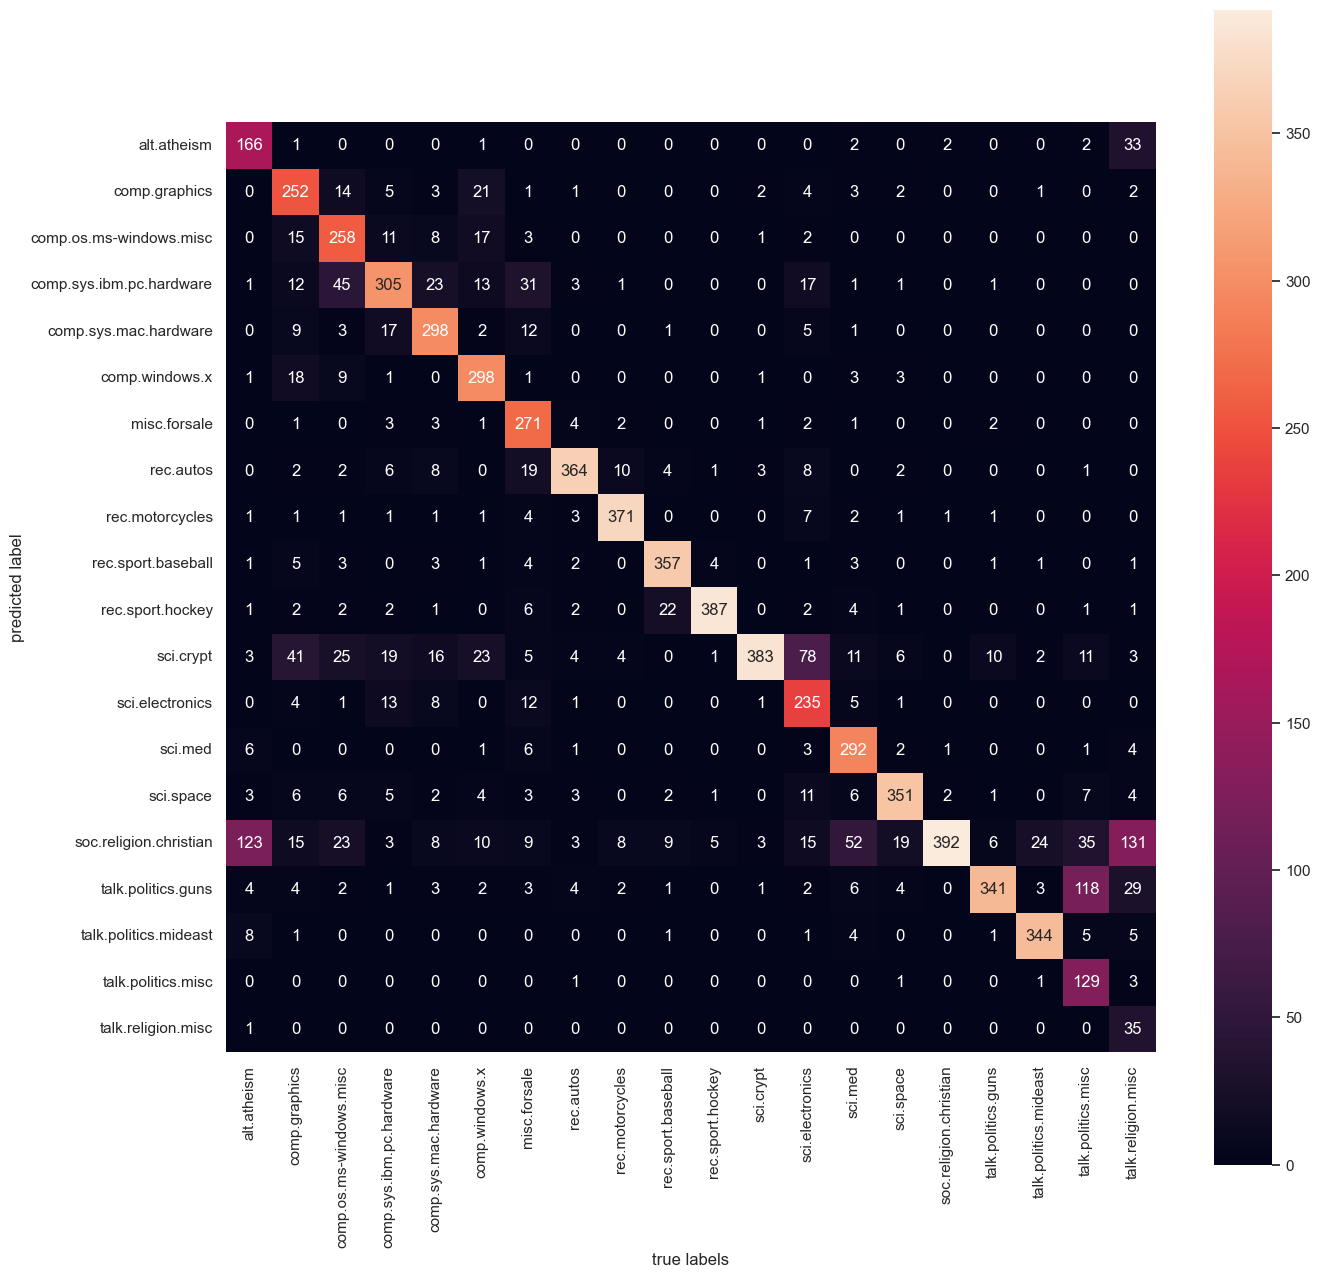

The accuracy is 0.7738980350504514


In [20]:
# plot the confusion matrix
mat = confusion_matrix(test_data.target, predicted_categories)
plt.figure(figsize=(15,15))
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", 
            xticklabels=train_data.target_names,
            yticklabels=train_data.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(test_data.target, predicted_categories)))

## Testing a new observation

In [22]:
# custom function to obtain the predicted category
def my_predictions(my_sentence, model):
    all_categories_names = np.array(data.target_names)
    prediction = model.predict([my_sentence])
    return all_categories_names[prediction]

my_sentence = "jesus"
print(my_predictions(my_sentence, model))

['soc.religion.christian']


In [23]:
my_sentence = "Are you an atheist?"
print(my_predictions(my_sentence, model))

['alt.atheism']


In [24]:
my_sentence = "I like baseball."
print(my_predictions(my_sentence, model))

['rec.sport.baseball']
